# Project 3 Collaborative Filtering

## Question 1:
Compute the sparsity of the movie rating dataset, where sparsity is defined by the following equation:
$$Sparsity = \frac{Total number of available ratings}{Total number of possible ratings}$$

In [2]:
# import data
import numpy as np
import csv
def loadCSVfile(name):
    try:
        tmp = np.loadtxt(name, dtype = np.str, delimiter = ",")
        data = tmp[1:,0:].astype(np.str) #加载数据部分
        label = tmp[0,0:].astype(np.str) #加载类别标签部分
    except ValueError:
        with open(name,"r",encoding = "UTF-8") as f:
            content = csv.reader(f)
            li = []
            i = 0
            for row in content:
                if i == 0:
                    label = np.array(row)
                else:
                    li.append(np.array(row))
                i += 1
            data = np.array(li)
    return data, label #返回array类型的数据

ratings, rate_label = loadCSVfile('ratings.csv')
tags, tag_label = loadCSVfile('tags.csv')
links, link_label = loadCSVfile('links.csv')
movies, movie_label = loadCSVfile('movies.csv')

In [3]:
print('-'*20,'ratings','-'*20)
print("The labels are:",rate_label)
print("How much is the data:",ratings.shape)
print('-'*20,'tags','-'*20)
print("The labels are:",tag_label)
print("How much is the data:",tags.shape)
print('-'*20,'links','-'*20)
print("The labels are:",link_label)
print("How much is the data:",links.shape)
print('-'*20,'movies','-'*20)
print("The labels are:",movie_label)
print("How much is the data:",movies.shape)

-------------------- ratings --------------------
The labels are: ['userId' 'movieId' 'rating' 'timestamp']
How much is the data: (100836, 4)
-------------------- tags --------------------
The labels are: ['userId' 'movieId' 'tag' 'timestamp']
How much is the data: (3683, 4)
-------------------- links --------------------
The labels are: ['movieId' 'imdbId' 'tmdbId']
How much is the data: (9742, 3)
-------------------- movies --------------------
The labels are: ['movieId' 'title' 'genres']
How much is the data: (9742, 3)


In [4]:
def sparsity(data):
    rate = 0
    total = len(data)
    for i in data:
        if i.startswith("0"):
            pass
        else:
            rate+=1
    return float(rate)/float(total)

sparsity(ratings[:,2])

0.9864135824507121

## Question 2:
Plot a histogram showing the frequency of the rating values. To be specific, bin the rating values into intervals of width 0.5 and use the binned rating values as the horizontal axis. Count the number of entries in the ratings matrix R with rating values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram.

In [5]:
from collections import Counter
rating_span = np.arange(0.5,5.5,0.5)
rating_counter = Counter(ratings[:,2])
rating_counter2 = [rating_counter[str(i)] for i in rating_span]
rating_count = np.array([rating_span,rating_counter])
rating_counter

Counter({'0.5': 1370,
         '1.0': 2811,
         '1.5': 1791,
         '2.0': 7551,
         '2.5': 5550,
         '3.0': 20047,
         '3.5': 13136,
         '4.0': 26818,
         '4.5': 8551,
         '5.0': 13211})

Text(0.5,1,'Frequency of rating values')

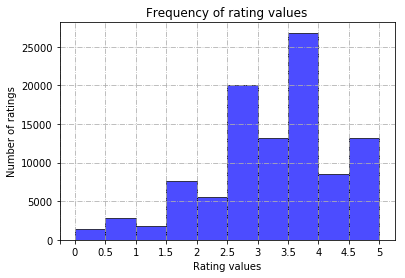

In [6]:
# plot the histogram
import matplotlib.pyplot as plt
%matplotlib inline
plt.bar(rating_span, rating_counter2, 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks((0,0.25,0.75,1.25,1.75,2.25,2.75,3.25,3.75,4.25,4.75,5.25),(u'',u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating values')
plt.ylabel('Number of ratings')
plt.title('Frequency of rating values')

## Question 3:
Plot the distribution of the number of ratings received among movies. To be specific, the X-axis should be the movie index ordered by decreasing frequency and the Y-axis should be the number of ratings the movie has received. For example, the movie that has the largest number of ratings has index 1; ties can broken in any way. A monotonically decreasing curve instead of a histogram is expected.

In [7]:
movie_rate = Counter(ratings[:,1])
movie_rate_dec = sorted(movie_rate.items(),key = lambda item: item[1],
                 reverse = True)
movie_y = [i[1] for i in movie_rate_dec]
movie_x = [i[0] for i in movie_rate_dec]

Text(0.5,1,'Distribution of the number of ratings received among movies')

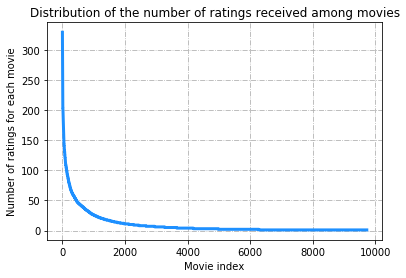

In [8]:
length = len(movie_y)
plt.plot(range(1,length+1),movie_y,color='dodgerblue',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('Movie index')
plt.ylabel('Number of ratings for each movie')
plt.title('Distribution of the number of ratings received among movies')

## Question 4:
Plot the distribution of ratings among users. To be specific, the X-axis should be the user index ordered by decreasing frequency and the Y-axis should be the number of movies the user have rated. The requirement of the plot is similar to that in Question 3.

In [9]:
user_rate = Counter(ratings[:,0])
user_rate_dec = sorted(user_rate.items(),key = lambda item: item[1],
                      reverse = True)
user_y = [i[1] for i in user_rate_dec]
user_x = [i[0] for i in user_rate_dec]

Text(0.5,1,'Distribution of ratings among users')

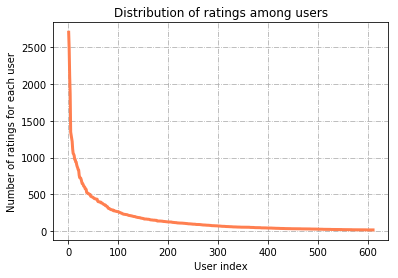

In [10]:
length = len(user_y)
plt.plot(range(1,length+1),user_y,color='coral',linewidth = 3)
plt.grid(True,linestyle = '-.')
plt.xlabel('User index')
plt.ylabel('Number of ratings for each user')
plt.title('Distribution of ratings among users')

## Question 5:
Explain the salient features of the distribution found in question 3 and their implications for the recommendation process.

#### There are so many movies but the number of ratings are nothing comparing to that of movies. And there are so many movies that only one or two ratings are received. 

## Question 6:
Compute the variance of the rating values received by each movie. Then, bin the variance values into intervals of width 0.5 and use the binned variance values as the horizontal axis. Count the number of movies with variance values in the binned intervals and use this count as the vertical axis. Briefly comment on the shape of the histogram. 

In [11]:
# Calculate the variance of ratings for each movie
def get_var(data):
    length = data.shape[0]
    d = {}
    d_key = set(data[:,0])
    for i in d_key:
        li = []
        for j in range(length):
            if i == data[j,0]:
                li.append(float(data[j,1]))
        d_var = np.var(li)
        d[i] = d_var
    return d

rating_var_dict = get_var(ratings[:,1:3])

In [12]:
# Compute the number of movies in each variance interval
import math
def get_interval(var_dict):
    max_value = max(var_dict.values())
    interval = np.arange(0,float(float(math.ceil(max_value*2))/2+0.5),0.5)
    length = len(interval)
    counter = {}
    for i in interval[:-1]:
        counter[i] = 0
    for item in var_dict.items():
        for i in range(length-1):
            if item[1]>=interval[i] and item[1]<interval[i+1]:
                counter[interval[i]]+=1
    return counter, interval

rating_var_count,interval = get_interval(rating_var_dict)
print('The number of ratings to each interval of variance:')
rating_var_count

The number of ratings to each interval of variance:


{0.0: 5996,
 0.5: 2313,
 1.0: 990,
 1.5: 265,
 2.0: 100,
 2.5: 22,
 3.0: 27,
 3.5: 4,
 4.0: 4,
 4.5: 1,
 5.0: 2}

Text(0.5,1,'Variance of the rating values rerceived by each movie')

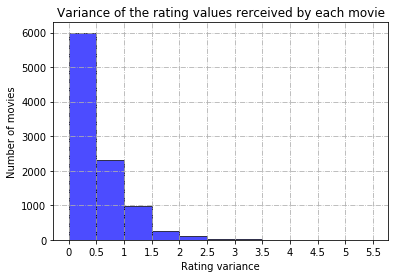

In [13]:
# show time
plt.bar(rating_var_count.keys(), rating_var_count.values(), 0.5,facecolor="blue", edgecolor="black", alpha=0.7)
plt.xticks(interval-0.25,(u'0',u'0.5',u'1',u'1.5',u'2',u'2.5',u'3',u'3.5',u'4',u'4.5',u'5',u'5.5'))
plt.grid(True,linestyle='-.')
plt.xlabel('Rating variance')
plt.ylabel('Number of movies')
plt.title('Variance of the rating values rerceived by each movie')

## Question 7:
Write down the formula for $\mu_u$ in terms of $I_u$ and $r_{uk}$

$$\mu_u = \frac{\sum_{k = I_u[0]}^{I_u[-1]} r_{uk}}{len(I_u)}$$ 

## Question 8:
In plain words, explain the meaning of $I_u \bigcap I_v$ . Can $I_u \bigcap I_v = \phi$ (Hint: Rating matrix R is sparse).

## Question 9:
Can you explain the reason behind mean-centering the raw ratings $(r_{uj}-\mu_v)$ in the prediction function? (Hint: Consider users who either rate all items highly or rate all items poorly and the impact of these users on the prediction function)

## Question 10:
Design a k-NN collaborative filter to predict the ratings of the movies in the MovieLens dataset and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE and average MAE obtained by averaging the RMSE and MAE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis) and average MAE (Y-axis) against k (X-axis).

In [60]:
# define rating matrix
movie_num = len(set(movies[:,0]))
user_num = len(set(ratings[:,0]))
movie_id = movies[:,0]
user_id = list(set(ratings[:,0]))
user_id.sort(key=list(ratings[:,0]).index)
R_matrix = np.zeros([user_num,movie_num])

# put ratings into the R_matrix
total = len(ratings[:,0])
i,j = 0,0
for k in range(total):
    tag = 0
    while (i < user_num):
        if (j == movie_num):
            i += 1
            j = 0
        else:
            pass
        while (j < movie_num and i < user_num):
            if (user_id[i] == ratings[k,0] and movie_id[j] == ratings[k,1]):
                R_matrix[i][j] = float(ratings[k,2])
                tag = 1
                break
            else:
                j += 1
        if (tag):
            break
        else:
            pass
R_matrix

array([[4. , 0. , 4. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       [0. , 0. , 0. , ..., 0. , 0. , 0. ],
       ...,
       [2.5, 2. , 2. , ..., 0. , 0. , 0. ],
       [3. , 0. , 0. , ..., 0. , 0. , 0. ],
       [5. , 0. , 0. , ..., 0. , 0. , 0. ]])

In [62]:
# construct k-NN filter
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise import Reader
import os

file_path = os.path.expanduser('ratings.csv')
reader = Reader(line_format='user item rating timestamp', sep=',',skip_lines=1)
data = Dataset.load_from_file(file_path, reader=reader)
 
sim = {'name':'pearson','user_based':True}
knn = KNNWithMeans(k=2, min_k=1, sim_options=sim, verbose=True)
cross_validate(knn, data, measures=['RMSE', 'MAE'], cv=10, verbose=True)

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0203  1.0137  1.0270  1.0121  1

{'fit_time': (1.5547740459442139,
  2.053283214569092,
  1.9974775314331055,
  2.000609874725342,
  1.8942131996154785,
  2.005640745162964,
  1.8890330791473389,
  1.8809430599212646,
  1.959765911102295,
  1.751314640045166),
 'test_mae': array([0.78653909, 0.77994461, 0.79393414, 0.77940553, 0.78975038,
        0.77001749, 0.78231685, 0.78580311, 0.78798943, 0.7859466 ]),
 'test_rmse': array([1.02034327, 1.01368312, 1.02695895, 1.0120893 , 1.01763839,
        0.99820672, 1.01732703, 1.0193131 , 1.0204849 , 1.01715667]),
 'test_time': (1.2247209548950195,
  0.7779595851898193,
  1.085099220275879,
  0.972400426864624,
  1.3580660820007324,
  1.1838340759277344,
  1.0640840530395508,
  1.118016242980957,
  0.912559986114502,
  1.034191608428955)}

In [64]:
# try k-NN filter on different k
mae = []
rmse = []
sim = {'name':'pearson','user_based':True}
for k in range(2,102,2):
    knn = KNNWithMeans(k=k, min_k=1, sim_options=sim, verbose=True)
    result_dict = cross_validate(knn, data, measures=['RMSE', 'MAE'], 
                                 cv=10, verbose=True)
    mae.append(np.mean(result_dict['test_mae']))
    rmse.append(np.mean(result_dict['test_rmse']))

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    1.0106  1.0146  1.0069  1.0200  1

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9065  0.8952  0.8920  0.8900  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8971  0.8840  0.8745  0.8981  0.8939  0.8913  0.8904  0.8892  0.8904  0.88

Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8795  0.8757  0.8954  0.8899  0

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8828  0.8896  0.8881  0.8881  0.9060  0.8757  0.8917  0.8945  0.8877  0.88

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8959  0.8885  0.8807  0.8895  0.8889  0.8860  0.8992  0.8925  0.8905  0.89

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8910  0.8917  0.8982  0.8855  0.8869  0.8787  0.8813  0.8950  0.8858  0.89

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8992  0.8717  0.8875  0.8876  0.8915  0.8822  0.8935  0.8897  0.8890  0.89

Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Computing the pearson similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.8844  0.8969  0.8806  0.8937  0.8902  0.8864  0.8902  0.8881  0.8973  0.88

Text(0.5,1,'MAE against k')

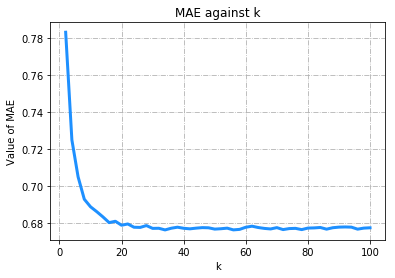

In [69]:
# plot 
x = range(2,102,2)
# MAE
plt.plot(x,mae,color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k')

Text(0.5,1,'RMSE against k')

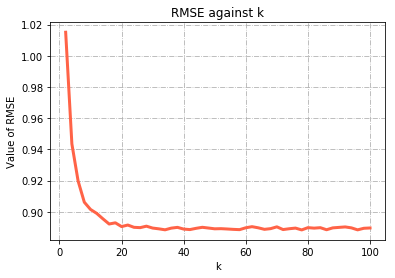

In [71]:
# RMSE
plt.plot(x,rmse,color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k')

## Question 11:
Use the plot from question 10, to find a 'minimum k'. Note: The term 'minimum k' in this context means that increasing k above the minimum value would not result in a significant decrease in average RMSE or average MAE. If you get the plot correct, then 'minimum k' would correspond to the k value for which average RMSE and average MAE converges to a steady-state value. Please report the steady state values of average RMSE and average MAE.

Text(0.5,1,'MAE against k (zoomed version)')

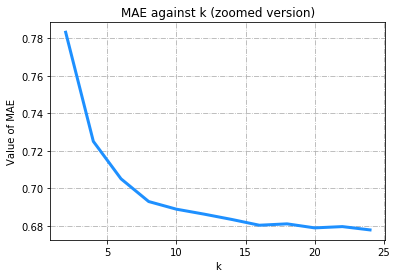

In [73]:
#  zoom MAE
plt.plot(x[:12],mae[:12],color='dodgerblue',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of MAE')
plt.title('MAE against k (zoomed version)')

Text(0.5,1,'RMSE against k (zoomed version)')

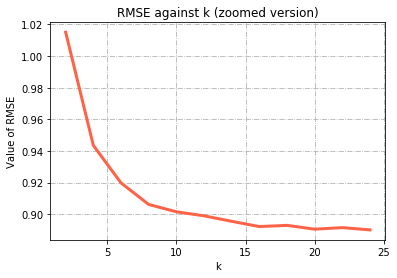

In [74]:
# zoom RMSE
plt.plot(x[:12],rmse[:12],color='tomato',linewidth=3)
plt.grid(True,linestyle='-.')
plt.xlabel('k')
plt.ylabel('Value of RMSE')
plt.title('RMSE against k (zoomed version)')

#### The min stable state is when k = 16

## Question 12:
Design a k-NN collaborative filter to predict the ratings of the movies in the popular movie trimmed test set and evaluate it's performance using 10-fold cross validation. Sweep k (number of neighbors) from 2 to 100 in step sizes of 2, and for each k compute the average RMSE obtained by averaging the RMSE across all 10 folds. Plot average RMSE (Y-axis) against k (X-axis). Also, report the minimum average RMSE.